# Hands-on Practice: Aitken's Acceleration

### [Lecture](https://ceiba.ntu.edu.tw/course/7a770d/content/cmath2019_note1_aitken.pdf)

## Let $f(x)=\cos(x)$ be the target function and $\alpha$ is a fixed point of $f(x)$ i.e. $\alpha = f(\alpha).$ 

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Implement the target function.

In [2]:
def f(x):
    # ===== 請實做程式 =====
    return np.cos(x)
    # ====================

### Run built-in [fixed-point method](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html#rf001026ae057-1) with Python SciPy, and use this accurate value as the fixed point $\alpha$.

In [3]:
from scipy import optimize
alpha = optimize.fixed_point(f, x0=1, xtol=1e-10)
print('The fixed point is', alpha)

The fixed point is 0.7390851332151607


### Visualization

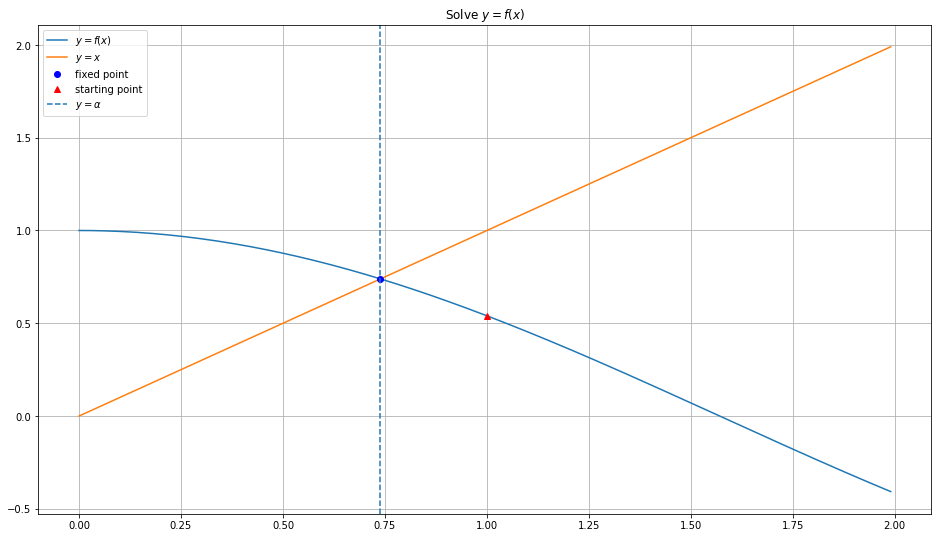

In [4]:
x_range = np.arange(0, 2, 0.01)
plt.figure(figsize=(16, 9))
plt.title(r'Solve $y=f(x)$')
plt.plot(x_range, f(x_range), label=r'$y=f(x)$')
plt.plot(x_range, x_range, label=r'$y=x$')
plt.plot(alpha, f(alpha), 'bo', label='fixed point')
plt.plot(1.0, f(1.0), 'r^', label='starting point')
plt.axvline(x=alpha, linestyle='--', label=r'$y=\alpha$')
plt.gca().legend()
plt.grid()
plt.show()

---

### Find the fixed point of $f(x)$ using your fixed-point iteration to within tolerance $10^{-10}$ with initial guess $x_0=1$

#### Step 1. Implement the fixed point method

In [5]:
def fixed_point(
    func,
    x_0,
    tolerance=1e-10,
    max_iterations=5
):
    '''Find the fixed point of the given function func

    Parameters
    ----------
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution func(x)=x.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process
        history: {'x_n': list}
    '''

    # ===== 請實做程式 =====
    # Set the initial condition
    x_n = x_0
    num_iterations = 0
    
    # history of solving process
    history = {'x_n': []}
        
    while True:

        # Find the value of f(x_n)
        f_of_x_n = func(x_n)
        
        # Evaluate the error
        error = abs(f_of_x_n - x_n)
        
        history['x_n'].append(x_n)

        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return x_n, history
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = f_of_x_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return x_n, history
    # ====================

#### Step 2. Find the root

In [6]:
solution, history = fixed_point(
    # ===== 請實做程式 =====
    f,
    x_0=1,
    tolerance=1e-10,
    max_iterations=100
    # =====================
)

Found solution after 57 iterations.


In [7]:
print('My estimation is', solution)

My estimation is 0.7390851331706995


### Verify the theoretical deduction $$\lim_{n\to\infty} \frac{|x_{n+1} - \alpha|}{|x_{n} - \alpha|} = C$$

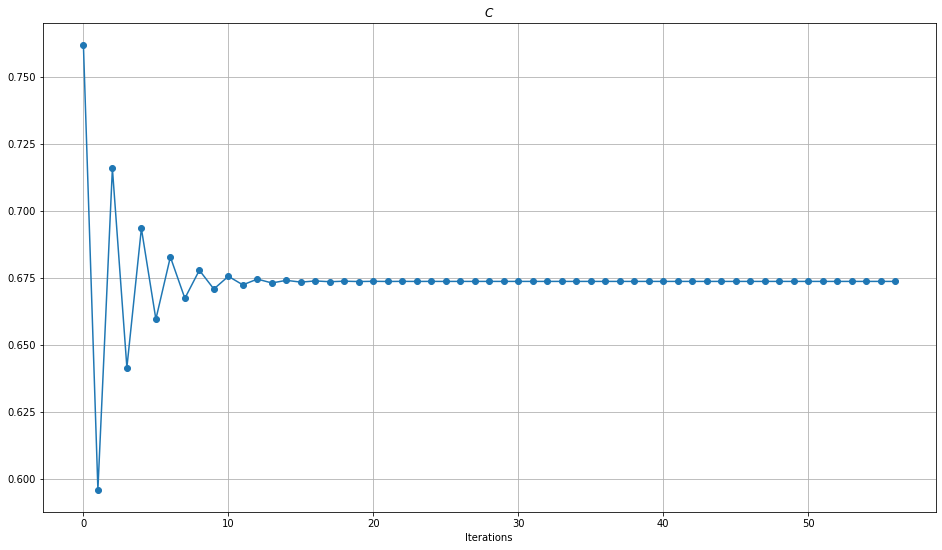

In [8]:
x_n = history['x_n']
e_n = abs(alpha - x_n)
plt.figure(figsize=(16, 9))
plt.plot(e_n[1:] / e_n[:-1], 'o-')
plt.title(r'$C$')
plt.xlabel('Iterations')
plt.grid()
plt.show()

## Review the convergence of the sequence $\{x_n\}$

#### Let $e_n \triangleq x_n - \alpha$.

### 1. Geometric Convergence

#### $$e_{n+1} = K e_n, |K| < 1.$$


### 2. Linear Convergence

#### $$e_{n+1} = (K+\sigma_n) e_n, |K| < 1, \sigma_n \to 0\text{, that is } \left|\frac{e_{n+1}}{e_n}\right| \to |K| < 1.$$

### We have learned that the convergence of the sequence $\{x_n\}$ can be accelerated by Aitken's  $\Delta^2$ method.

#### $$K = \frac{x_{n+2} -\alpha}{x_{n+1}-\alpha} = \frac{x_{n+1}-\alpha}{x_n-\alpha} \implies \alpha = \frac{x_{n+2}x_n - x_{n+1}^2}{x_{n+2}-2x_{n+1}+x_n} = x_n - \frac{(\Delta x_n)^2}{\Delta^2 x_n} \left(= x_{n+2} - \frac{(\Delta x_{n+1})^2}{\Delta^2 x_n}\right),$$ where $$\Delta x_n \triangleq x_{n+1}-x_{n}, \Delta^2 x_n = \Delta(x_{n+1}-x_n)=\Delta x_{n+1} - \Delta x_n = x_{n+2} - 2 x_{n+1} + x_n.$$

#### In practice, we use $$\alpha = x_n - \frac{(\Delta x_n)^2}{\Delta^2 x_n} = x_{n+2} - \frac{(\Delta x_{n+1})^2}{\Delta^2 x_n} = x_{n+2} - \frac{(x_{n+2}-x_{n-1})^2}{(x_{n+2}-x_{n+1})-(x_{n+1}-x_n)}\text{, where } x_{n+1} = f(x_n), x_{n+2} = f(x_{n+1}).$$

In [22]:
def accelerated_fixed_point(
    func,
    x_0,
    tolerance=1e-7,
    max_iterations=5,
):
    '''Find the fixed point of the given function func

    Parameters
    ---------- 
    func : function
        The target function.
    x_0 : float
        Initial guess point for a solution f(x)=x.
    tolerance: float
        One of the termination conditions. Error tolerance.
    max_iterations : (positive) integer
        One of the termination conditions. The amount of iterations allowed.

    Returns
    -------
    solution : float
        Approximation of the root.
    history: dict
        Return history of the solving process
        history: {'x_n': list}
    '''

    # ===== 請實做程式 =====
    # Set the initial condition

    x_n = x_0
    y_n = x_0
    num_iterations = 0
    
    # history of solving process
    # history = {'x_n': []}
    stack = [x_0, func(x_0),func(func(x_0))]
        
    while True:

        # Find the value of f(y_n)
        f_of_y_n = func(y_n)
        
        # Evaluate the error
        error = abs(f_of_y_n - y_n)
        
        # history['x_n'].append(x_n)

        # Satisfy the criterion and stop
        if error < tolerance:
            print('Found solution after', num_iterations,'iterations.')
            return (x_n, history)
        
        # Check the number of iterations
        if num_iterations < max_iterations:
            num_iterations += 1
            
            # Find the next approximation solution
            x_n = stack[num_iterations - 1]
            x_n_1 = stack[num_iterations]
            x_n_2 = stack[num_iterations + 1]
            y_n = x_n - ((x_n_1 - x_n)**2/(x_n_2 - 2*x_n_1 + x_n))
            stack.append(y_n)
            y_n = f_of_y_n
        
        # Satisfy the criterion and stop
        else:
            print('Terminate since reached the maximum iterations.')
            return (x_n, history)
    # =====================

#### Step 2. Find the root

In [23]:
solution, history = accelerated_fixed_point(
    # ===== 請實做程式 =====
    f,
    x_0=1,
    tolerance=1e-10,
    max_iterations=100,
    # ====================
)

Found solution after 57 iterations.


C:\Users\Howard\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


In [24]:
print('My estimation is', solution)

My estimation is nan
